<a href="https://colab.research.google.com/github/shqtbz143/202135992/blob/202135992-%EC%95%88%EC%84%9C%ED%98%84/%EA%B3%BC%EC%A0%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [208]:
from google.colab import drive

In [209]:
import pandas as pd
##데이터불러오기
gender = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gender_submission.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

In [210]:
#확인
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [211]:
#결측치 여부 확인하기
print(train.isnull().sum(axis=0))
print(test.isnull().sum(axis=0))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


각 column별 몇 개의 결측치가 있는지 확인 가능

In [212]:
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

train = train.drop(['Embarked'], axis=1)
test = test.drop(['Embarked'], axis=1)

test_Fare_mean = test['Fare'].mean()
test['Fare'] = test['Fare'].fillna(test_Fare_mean)

train_age_mean = train['Age'].mean()
test_age_mean = test['Age'].mean()

train['Age'] = train['Age'].fillna(train_age_mean)
test['Age'] = test['Age'].fillna(test_age_mean)

train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

drop으로 결측치 부분 제거하기
fillna 누락 데이터(NaN) 채우기,

In [213]:
#넘파이 배열
train_input = train[['Pclass', 'SibSp', 'Parch', 'Fare', 'Age', 'Sex']].to_numpy()
train_target = train['Survived'].to_numpy()

test_input = test[['Pclass', 'SibSp', 'Parch', 'Fare', 'Age', 'Sex']].to_numpy()
test_target = gender['Survived'].to_numpy()

결측치 처리부분을 거쳐 훈련 세트를 만들었다.
자료를 확인 후 survived 부분을 테스트 세트로 해야한다고 결정

In [214]:
#정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

특성값의 스케일을 맞춴 두 넘파이 배열을 준비한다.

In [215]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log',max_iter = 10, random_state = 202135992)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7699214365881033
0.868421052631579


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


테스트의 정확도가 낮다. 반복횟수가 부족하다고 판단.

In [216]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7609427609427609
0.8133971291866029


에포크를 한 번 더 실행하면 정확도가 향상될 것이라 판단하였지만.. 비슷하다.
과소적합도 너무 확실하게 나타났다.적은 에포크 횟수가 문제일까 싶어 한 번 더 실행

In [231]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8058361391694725
0.9545454545454546


정확도는 올라갔으나 과소적합 현상이 너무 뚜렷하게 나타난다..일단 진행

In [217]:
import numpy as np
sc = SGDClassifier(loss = 'log', random_state = 202135992)
train_score = []
test_score = []
classes = np.unique(train_target)

In [238]:
for _ in range(0, 100) :
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

혹시 몰라 에포크 횟수를 많이 늘려봤지만 결과는 똑같다.

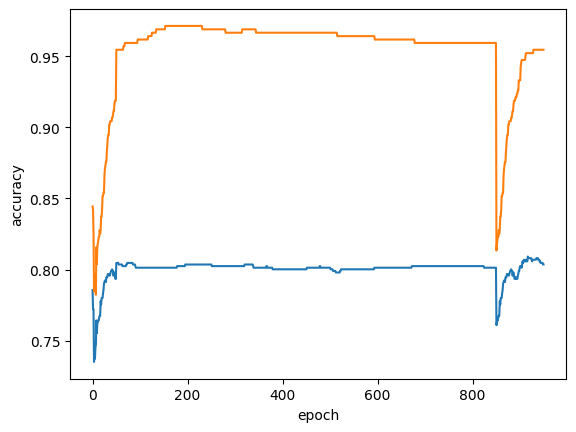

In [239]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

에포크 반복횟수를 다양하게 ㅂ바꿔 실행시켜봤지만 결과는 크게 달라지지 않았다.

In [240]:
sc = SGDClassifier(loss = 'log', max_iter = 10, tol = None, random_state = 202135992)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7699214365881033
0.868421052631579


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


과소적합상태에 낮은 정확도로 마무리됐다.

#결정트리


In [221]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 202135992)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))


0.9820426487093153
0.7990430622009569


훈련세트 점수는 높으나 테스트 세트 성능은 낮다. -> 과대적합이다.

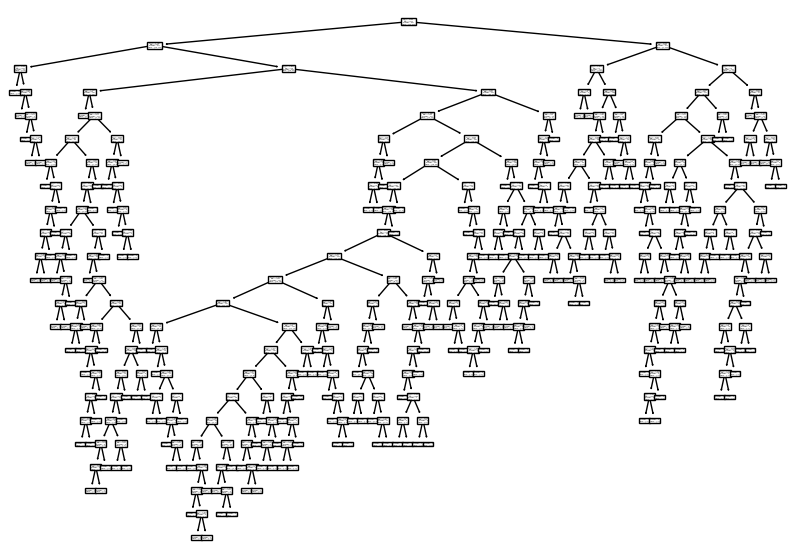

In [222]:
#결정 트리 그림 출력

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize = (10, 7))
plot_tree(dt)
plt.show()

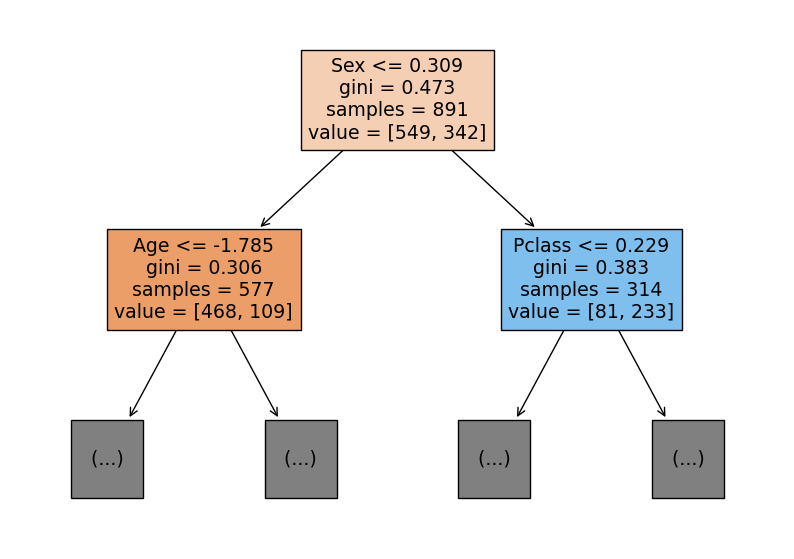

In [223]:
#트리의 깊이 제한하여 출력하기
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['Pclass', 'SibSp', 'Parch', 'Fare', 'Age', 'Sex'])
plt.show()

In [224]:
dt = DecisionTreeClassifier(max_depth = 8, random_state = 202135992)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8945005611672279
0.861244019138756


#랜덤 포레스트

In [225]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, random_state=202135992)

scores = cross_validate( rf, train_input, train_target,
                       return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9845678963707707 0.8148515472977212


#히스토그램기반 그레이디언트부스팅


In [226]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=202135992)
scores = cross_validate(hgb, train_input, train_target,
                       return_train_score=True)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9424795530831901 0.8215805661917018


In [227]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target,
                                n_repeats=10, random_state=202135992, n_jobs=-1)
print(result.importances_mean)

[0.10426487 0.02727273 0.01425365 0.12413019 0.13872054 0.22974186]


In [228]:
result = permutation_importance(hgb, test_input, test_target,
                               n_repeats=10, random_state=202135992, n_jobs=-1)
print(result.importances_mean)

[ 0.01842105 -0.00311005 -0.00311005  0.01220096  0.03397129  0.25909091]


In [229]:
hgb.score(test_input, test_target)

0.8373205741626795